In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# import models
from keras.models import Sequential

from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers import Activation
from keras import optimizers
from keras.constraints import maxnorm
# remove: from scipy.misc import toimage
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import plot_model


Using TensorFlow backend.


In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# load data from google drive
base_dir = "/content/drive/My Drive/Colab Notebooks/imgdata_224"

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
print(test_dir)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/imgdata_224/test


In [0]:
# build sequential Convnet model:
model = Sequential()
model.add(Conv2D(32,kernel_size=3, activation ='relu', input_shape=(224,224,3),kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))
# model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=3, activation ='relu',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))
# model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=3, activation ='relu',kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2),strides = None))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

In [0]:
# Using ImageDataGenerator to read images from directories
# all images will be rescaled by 1./255 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

Found 1600 images belonging to 2 classes.


In [0]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=8,
    class_mode ='categorical')

Found 384 images belonging to 2 classes.


In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=1,
    class_mode='categorical')


Found 200 images belonging to 2 classes.


In [0]:
from keras import callbacks as ca
es = ca.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=30)

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= 50,
                              epochs= 250,
                              validation_data= validation_generator,
                              validation_steps= 48,
                              callbacks = [es])


Instructions for updating:
Use tf.cast instead.
Epoch 1/250
50/50 [==============================] - 540s 11s/step - loss: 0.6963 - acc: 0.5194 - val_loss: 0.6896 - val_acc: 0.5312
Epoch 2/250
50/50 [==============================] - 22s 446ms/step - loss: 0.6899 - acc: 0.5225 - val_loss: 0.6885 - val_acc: 0.5547
Epoch 3/250
50/50 [==============================] - 27s 535ms/step - loss: 0.6836 - acc: 0.5631 - val_loss: 0.6753 - val_acc: 0.6250
Epoch 4/250
50/50 [==============================] - 26s 527ms/step - loss: 0.6794 - acc: 0.5550 - val_loss: 0.6654 - val_acc: 0.6146
Epoch 5/250
50/50 [==============================] - 26s 526ms/step - loss: 0.6679 - acc: 0.5813 - val_loss: 0.6521 - val_acc: 0.6302
Epoch 6/250
50/50 [==============================] - 26s 522ms/step - loss: 0.6582 - acc: 0.5988 - val_loss: 0.6536 - val_acc: 0.6250
Epoch 7/250
50/50 [==============================] - 27s 534ms/step - loss: 0.6514 - acc: 0.5988 - val_loss: 0.6421 - val_acc: 0.6250
Epoch 8/250
50/

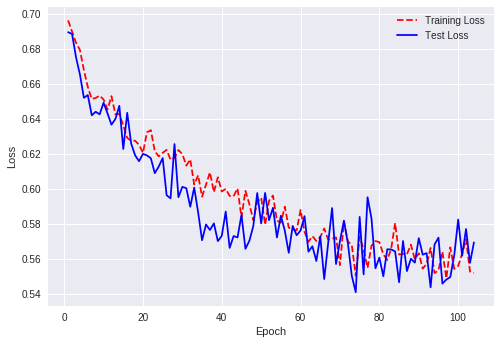

In [0]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


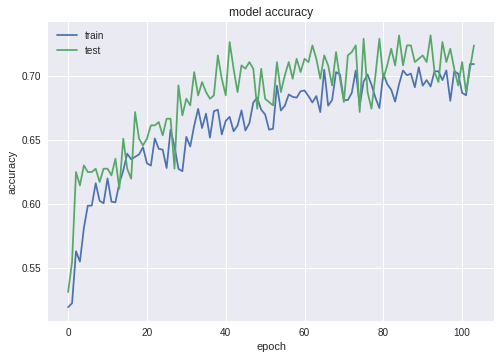

In [0]:
# Plot Training History. 
# list all data in history 
print(history.history.keys()) 

# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [0]:
print(model.trainable_weights)

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>, <tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>, <tf.Variable 'conv2d_2/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'conv2d_3/bias:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'dense_1/kernel:0' shape=(43264, 32) dtype=float32_ref>, <tf.Variable 'dense_1/bias:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'dense_2/kernel:0' shape=(32, 2) dtype=float32_ref>, <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32_ref>]


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report for Validation set
Y_pred = model.predict_generator(validation_generator, 384//8,verbose=1)
print(len(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)

print('\n\nConfusion Matrix (Validation Image set)')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cardiomegaly', 'No Finding']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# validation_generator [200//2]
# test_generator

48/48 [==============================] - 2s 36ms/step
384


Confusion Matrix (Validation Image set)
[[ 89 103]
 [ 79 113]]
Classification Report
              precision    recall  f1-score   support

Cardiomegaly       0.53      0.46      0.49       192
  No Finding       0.52      0.59      0.55       192

   micro avg       0.53      0.53      0.53       384
   macro avg       0.53      0.53      0.52       384
weighted avg       0.53      0.53      0.52       384



In [0]:
# Confution Matrix and Classification Report for Test Image set
Y_pred = model.predict_generator(test_generator, 200//1,verbose=1)
print(len(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)

print('\n\nConfusion Matrix (Test Image set)')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cardiomegaly', 'No Finding']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


200/200 [==============================] - 56s 278ms/step
200


Confusion Matrix (Test Image set)
[[35 65]
 [47 53]]
Classification Report
              precision    recall  f1-score   support

Cardiomegaly       0.43      0.35      0.38       100
  No Finding       0.45      0.53      0.49       100

   micro avg       0.44      0.44      0.44       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.44      0.44       200



In [0]:
# serialize weights to HDF5
model.save_weights("assign_1a_2_saved_model.h5")
print("Saved model to disk")

Saved model to disk
